# Pretrain Fine

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re

from plotting_analysis_funcs import *

/var/folders/by/b05bkcn50tb0fx4h3hhz0h800000gn/T/ipykernel_80602/2426438369.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# ResNeXt50

learning rate

# ResNeXt101

learning rate

Epochs: 400
Lowest loss 8.1940 at learning rate 9.61e-02


0.09605058

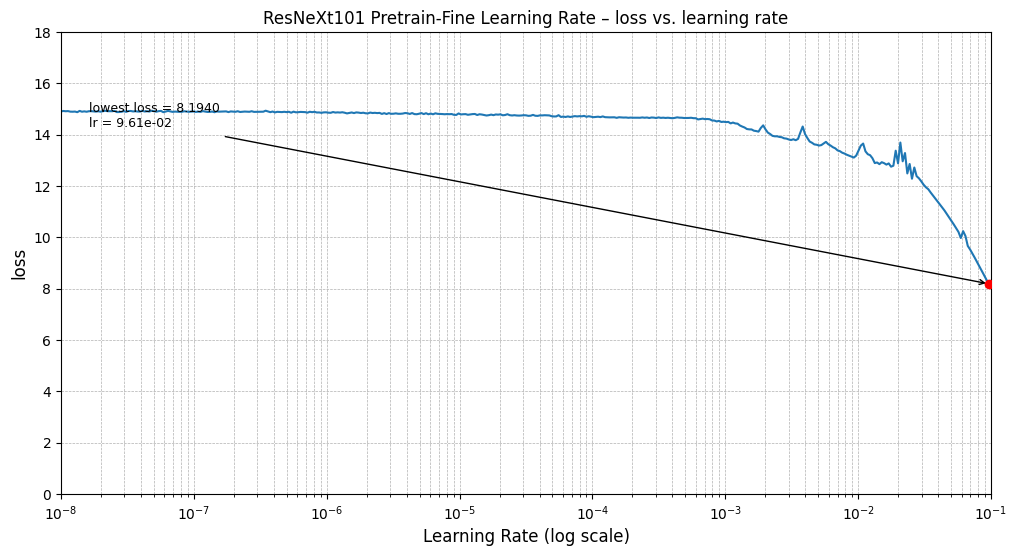

In [6]:
path_to_resnext101_pretrain_fine_learning_rate = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/pretrain_fine/resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_lr_run_2025_10_16_23_02_28/history_resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_lr_run_2025_10_16_23_02_28.npy')

plot_lr_history(path_to_resnext101_pretrain_fine_learning_rate, 'ResNeXt101 Pretrain-Fine Learning Rate', 18)

I'll pick 3 x 10^-2 (0.03)

# ResNet152

learning rate

Epochs: 400
Lowest loss 9.3387 at learning rate 9.61e-02


0.09605058

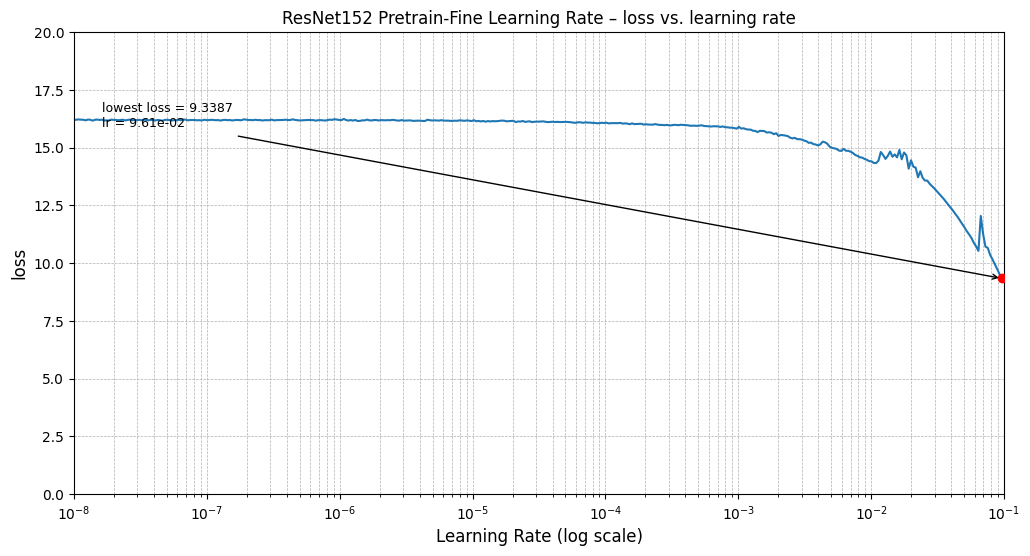

In [4]:
path_to_resnet152_pretrain_fine_learning_rate = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/pretrain_fine/resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_lr_run_2025_10_16_19_39_20/history_resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_lr_run_2025_10_16_19_39_20.npy')

plot_lr_history(path_to_resnet152_pretrain_fine_learning_rate, 'ResNet152 Pretrain-Fine Learning Rate', 20)

I'll pick 10^-2